<a href="https://colab.research.google.com/github/brenoslivio/Statistics-Python/blob/main/1-DescriptiveAnalysis/1_DescriptiveAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Analysis

*There are many ways to analyse data, but one of the most known methods in Statistics is probably descriptive analysis,  which seeks to describe or summarize past and present data, helping to create accessible data insights. It's the field of Statistics that deals with the description and summarization of data. It will be given some practical examples of this kind of analysis using a dataset. Recommended text for the subject are the Chapters 2 and 3 from **Introductory Statistics** by **Sheldon M. Ross**, which will be our main source of knowledge in this notebook.*



---



## Table of contents


1. [Data type](#type)

  1.1 [Qualitative variables](#qualita)

  * [Nominal](#nominal)

  * [Ordinal](#ordinal)

  * [Scales](#scale1)

  1.2 [Quantitative variables](#quantita)

  * [Discrete](#discrete)

  * [Continuous](#cont)

  * [Scales](#scale2)

2. [Measures of position](#mespos)

  2.1 [Quantiles](#quantiles)

  * [Percentiles](#percentiles)

  * [Deciles](#deciles)

  * [Quartiles](#quartiles)

  * [Median](#median)

  2.2 [Mean](#mean)

  2.3 [Mode](#mode)

3. [Measures of dispersion](#mesdis)

  3.1 [Variance](#variance)

  3.2 [Standard deviation](#sd)

  3.3 [Range](#range)

  3.4 [Interquantile range](#iqr)

4. [Table of frequencies](#table)

  4.1 [Absolute](#absolute)

  4.2 [Relative](#relative)

  4.3 [Simple](#simple)

  4.4 [Cumulative](#cumulative)

  4.5 [Complete frequency table examples](#freqex)

5. [Graphs](#graphs)

  5.1 [Pie chart](#pie)

  5.2 [Bar chart](#bar)

  5.3 [Pareto chart](#pareto)

  5.4 [Boxplot](#boxplot)

  5.5 [Scatter plot](#dispersion)

  5.6 [Line chart](#line)

6. [References](#refs)




---



## Data type <a name="type"></a>

We can divide our data in some types which are definitely important to treat and understand the data to visualize and plot graphs.


### Qualitative variables <a name="qualita"></a>

Data like this don't have a proper mathematical meaning and they are usually used as labels for variables. They represent quality and the values can be associated with categories. Some can be sorted, but arithmetic operations are not aplicable.

#### Nominal <a name="nominal"></a>

We have examples as labeling data. They don't indicate a order relation.

$$\text{e.g.}\;\text{Sex:}\;\{Male, Female\}; \text{Bank Id:}\;\{44641, 22442\}.$$ 

#### Ordinal <a name="ordinal"></a>

Like nominal data, they are labels but can indicate a kind of order.

$$\text{e.g.}\;\text{Fever:}\;\{High, Medium, Low\}; \text{Height:}\;\{Tall, Short\}.$$

#### Scales <a name="scale1"></a>

We have also nominal and ordinal scales.

**Nominal scales**: We can use operations such as $=$ and $\neq$.

**Ordinal scales**: We can use operations such as $=,\neq, \lt, \gt, \le, \ge $. 

### Quantitative variables <a name="quantita"></a>

This type of data have proper mathematical meaning and we can use for number operations. They are numeric and have some associated unit. They also can be sorted.

#### Discrete <a name="discrete"></a>

We have usually $\mathbb{Z}$ values, which are countable. Binary variables (boolean) are also discrete.

$$\text{e.g.}\;\{5, 26, 51\}; \{0, 1\}$$

#### Continuous <a name="cont"></a>

In this case we have $\mathbb{R}$ values, which can be infinite. Continuous variables are usually defined as measurements.

$$\text{e.g.}\;\text{Weight:}\;\{2.57kg, 5.45kg, 3.89kg\}; \text{Distance:}\;\{6.7km, 2.3km\}.$$

#### Scales <a name="scale2"></a>

We also have interval and rational scales

**Interval scales**: We can use operations such as $=, \neq, \lt, \gt, \le, \ge, +, -$ e.g. ºC or ºF.

**Rational scales**: We can use operations such as $=, \neq, \lt, \gt, \le, \ge, +, -, *, /$ e.g. Kelvin temperature, money. This scale have an absolute zero.

## Loading the data

With the explanation about data types, we will load a dataset to use as example to take different measurements and observations. We load with a Pandas data frame.

In [ ]:
import pandas as pd
import numpy as np

dfPoll = pd.read_csv("https://raw.githubusercontent.com/brenoslivio/Statistics-Python/main/1-DescriptiveAnalysis/dataset.csv",
    dtype={
        "Qual sua idade?": np.int32,
        "Qual sua altura em metros?": np.float64,
        "Seu peso em kg.": np.int32,
        "Sexo?": str,
        "Grau de escolaridade?": str,
        "Em qual estado você nasceu?": str,
        "Em quantos irmãos vocês são (contando contigo)?": np.int32,
        "Quantos membros tem sua família? (Quantos moram contigo, ou 1 caso more sozinho)": np.int32,
        "Você trabalha/estuda atualmente?": str,
        "Qual atividade realiza com mais frequência?": str,
    },
    na_values="",
)

dfPoll.columns =['age', 'height_m', 'weight_kg', 'sex', 'schooling', 'state', 'brothersplus_you', 'family_members', 'work_study', 'freq_activity'] 

dfPoll.sample(5) # Five random sample to show

,age,height_m,weight_kg,sex,schooling,state,brothersplus_you,family_members,work_study,freq_activity
19,29,1.73,75,F,Pós-graduação (completo ou incompleto),RJ,3,6,trabalho e estudo,Rede social
11,32,1.82,91,M,Pós-graduação (completo ou incompleto),MS,4,4,trabalho,Ler livro
17,20,1.71,93,M,Ensino superior (completo ou incompleto),SP,1,3,estudo,Rede social
44,22,1.67,75,F,Ensino superior (completo ou incompleto),SP,2,3,estudo,Ler livro
62,40,1.78,90,M,Pós-graduação (completo ou incompleto),SP,2,3,trabalho e estudo,Jogar videogame


## Measures of position <a name="mespos"></a>

#### Mean <a name="mean"></a>

We can only use for quantitative data for using numeric data. We get the average value of the data:

$$\overline{X} = \displaystyle\sum_{i=1}^{N}\frac{X_i}{N}$$

Let's get the mean of the ages in our dataset:

In [ ]:
sum(dfPoll['age'])/len(dfPoll['age']) # Like the formula

26.220588235294116

In [ ]:
dfPoll['age'].mean() # Pandas method to return the mean

26.220588235294116

#### Median <a name="median"></a>

We find the value in the center position, but for this we must analyse if the data is odd or even:

$$median(X) = \left\{ \begin{array}{cl}
\frac{1}{2}(X_r + X_{r+1}) & : \ X\;\text{is even}\;(n = 2r)\\
X_{r+1} & : \ X\;\text{is odd}\;(n = 2r + 1)
\end{array} \right.$$

If we have assymetric data, $median(X) \neq \overline{X}$. On a normal distribution we can have a much better approximation.

Median can also work better for outliers/discrepant values.

Getting the median for a variable of the dataset:

In [ ]:
height = dfPoll['height_m'].sort_values(ascending=True)

height = height.reset_index(drop=True)

median = 0

if(len(height) % 2 == 0): # if data is even
  median = (height[int((len(height)/2)-1)] + height[int(len(height)/2)])/2
else: # if data is odd
  median = height[int(len(height)/2)]

median

1.705

In [ ]:
dfPoll['height_m'].median() # direct approach

1.705

### Mode <a name="mode"></a>

Returns the value that appears more times on a given data. We can use for any data type.

Let's find the mode for the column state:

In [ ]:
state = dfPoll['state'].value_counts().to_frame() # Creating a data frame that count the frequency that all values appear
state.reset_index(level=0, inplace=True) 
state.columns = ['State', 'Count']

state.max()

State    SP
Count    45
dtype: object

In [ ]:
dfPoll['state'].mode() # direct approach

0    SP
dtype: object

### Quantiles <a name="quantiles"></a>

Quantiles are the idea of splitting the data distribution that we are working with. We have methods like Percentiles, Deciles and Quartiles. The list must be ordered.

#### Percentiles <a name="percentiles"></a>

We can divide the distribution in 100 parts with $(0 < p \leq 100)$. To find the P-th percentile for $N$ we can use an ordinal rank given by:

$$ n = \frac{p}{100}\times (N - 1) + 1.$$

If $n$ is whole, we would have that $P_{p} = x_n$

So if we have an ordered list like $\{3, 7, 9, 24, 30\}$, with $N = 5$.

And we want the 30th Percentile, we would have:

$$n = \frac{30}{100}\times (5 - 1) + 1 = 2.2 $$

We don't have a whole number so we will use:

$$P_{p} = x_{ni} + n_{f} \times (x_{ni+1} - x_{ni})$$

$ni$ would be the integer part of n, $n_f$ is the fractional part of n, so we would have:

$$P_{30th} = x_{2} + 0.2 \times (x_{3} - x_{2}) = 7 + 0.2\times(9 - 7) = 7.4$$

Let's see the idea using a code to find the 39th Percentile for the weights:

In [ ]:
weight = dfPoll['weight_kg'].sort_values(ascending=True)

weight = weight.reset_index(drop=True)

p = 39

n = (p/100)*(len(weight) - 1) + 1

P = 0

if(n % 1 == 0):
  P = weight[n - 1]
else:  
  P = weight[int(n) - 1] + (n % 1)*(weight[int(n)] - weight[int(n) - 1])

P

65.26

In [ ]:
dfPoll['weight_kg'].quantile(0.39) # direct approach

65.26

#### Deciles <a name="deciles"></a>

Uses the idea of percentiles, but splitting the data distribution into 10 parts. So each part represents $\frac{1}{10}$ of the sample or population. So finding the 4th Decile is finding the 40th Percentile.

So finding 4th Decile for the weights:

In [ ]:
dfPoll['weight_kg'].quantile(0.4)

66.60000000000001

#### Quartiles <a name="quartiles"></a>

Quartiles split the data in four more or less quarters.

1st Quartile $Q_1$ $\rightarrow$ value that have 25% of values below or to the left of it;

2nd Quartile $Q_2$ $\rightarrow$ 50%, median;

3rd Quartile $Q_3$ $\rightarrow$ value that have 75% of values below or to the left of it;

Again we can use the concept of Percentile to find the $Q_1 = P_{25th}, Q_2 = P_{50th}$ and $Q_3 = P_{75th}$.

Let's check if the median is really $Q_2$:

In [ ]:
Q2 = dfPoll['weight_kg'].quantile(0.50)

Q2

69.5

In [ ]:
dfPoll['weight_kg'].median()

69.5

## Measures of dispersion <a name="mesdis"></a>

### Variance <a name="variance"></a>

Variance is the difference of the squared expected value and the expected value, so we would have:

$$\sigma^2 = E[X^2] - E[X] = \frac{1}{N}\displaystyle\sum_{i=1}^{N}(x_i - \mu)^2$$

And for sample ([unbiased estimator](https://en.wikipedia.org/wiki/Bessel%27s_correction)):

$$\sigma^2  = \frac{1}{N - 1}\displaystyle\sum_{i=1}^{N}(x_i - \mu)^2$$

It's the mean of the quadratic distance in relation to the mean of the data.

In [ ]:
mu = dfPoll['family_members'].mean()

sum((dfPoll['family_members'] - mu)**2)/(len(dfPoll['family_members']))

1.8207179930795854

In [ ]:
dfPoll['family_members'].var(ddof = 0) # direct approach for population, degrees of freedom

1.8207179930795854

### Standard deviation <a name="sd"></a>

For the standard deviation, we must analyse if we are dealing with a population or sample, so for the population:

$$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{N}\displaystyle\sum_{i=1}^{N}(x_i - \mu)^2}$$

And for sample (unbiased estimator):

$$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{N - 1}\displaystyle\sum_{i=1}^{N}(x_i - \mu)^2}$$

In [ ]:
import math

mu = dfPoll['family_members'].mean()

math.sqrt(sum((dfPoll['family_members'] - mu)**2)/(len(dfPoll['family_members'])))

1.349339836023374

In [ ]:
dfPoll['family_members'].std(ddof = 0) # direct approach for population

1.349339836023374

Note that for both variance and standard deviation we must use `ddof = 0` if we want to deal with a population. [By default](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html) is `ddof = 1`, which is used for samples, with the equation demonstrated.

### Interquantile range <a name="iqr"></a>



It's simply the difference between the 3rd quartile $Q_3$ and the 1st quartile $Q_1$:

$$IQR = Q_3 - Q_1$$

Finding the IQR for the height:

In [ ]:
height = dfPoll['height_m']

Q1 = height.quantile(0.25) 
Q3 = height.quantile(0.75) 
IQR = Q3 - Q1 

IQR

0.1725000000000001

Usually we use the interquantile range to find discrepant values called outliers. We can use the following idea:

$$outliers = x_i\;<\;(Q_1 - k.IQR)\;\vee\;x_i\;>\;(Q_3 + k.IQR)$$

In many places we would find $k = 1.5$, and usually is enough for to treat data, but there are (somewhat rare) exceptions.

Let's code it for finding outliers in height's column:

In [ ]:
outliers = dfPoll.loc[
    (dfPoll.loc[:, "height_m"] < (Q1 - 1.5 * IQR))
    | (dfPoll.loc[:, "height_m"] > (Q3 + 1.5 * IQR)),
    :,]

outliers

,age,height_m,weight_kg,sex,schooling,state,brothersplus_you,family_members,work_study,freq_activity
7,34,1.3,54,F,6º ao 9º ano,MS,4,4,"nem trabalho, nem estudo",Assistir TV


### Range <a name="range"></a>

It's difference between the maximum value and the minimum value of the data:

$$R(X) = max(X) - min(X)$$

In [ ]:
R = dfPoll['brothersplus_you'].max() - dfPoll['brothersplus_you'].min()

R

7

## Table of frequencies <a name="table"></a>

Each variable can have different values. For example, we can have the variable `Fruit` with the situation that some values are 'Apple', 'Banana' and many others. We can analyse the frequency these values appear.

| Fruit | Simple absolute frequency $f_i$ | Simple relative frequency $n_i$ | Cumulative frequency $F_i$ | Relative cumulative frequency $N_i$ |
|-|-|-|-|-|
| Apple | 3 | $\frac{3}{15}$ | 3 | $\frac{3}{15}$ |
| Orange | 3 | $\frac{3}{15}$ | 3 + 3 = 6 | $\frac{6}{15}$ |
| Banana | 7 | $\frac{7}{15}$ | 3 + 3 + 7 = 13 | $\frac{13}{15}$ |
| Pear | 2 | $\frac{2}{15}$ | 3 + 3 + 7 + 2 = 15 | $\frac{15}{15}$ |
| $\sum$ | 15 | 1 |  |  |

### Absolute <a name="absolute"></a>

It's the number of times that a value appears. If we sum all the absolute frequencies we can find the total number of data $N$, so with $f_i$ being an absolute frequency for a value we have:

$$\displaystyle\sum_{i=1}^{n}f_i = N$$

We can count the frequency for each value with the following code:

In [ ]:
dfPoll['freq_activity'].value_counts()

Rede social         20
Ler livro           15
Jogar videogame     12
Assistir TV         12
Cozinhar             6
Praticar esporte     3
Name: freq_activity, dtype: int64

And summing them give us the number of rows for the column:

In [ ]:
sum(dfPoll['freq_activity'].value_counts())

68

### Relative <a name="relative"></a>

It's proportion of the frequency of a value $f_i$ compared to all data $N$. The sum of the relative frequencies must be 1:

$$n_i = \frac{f_i}{N}$$

The same idea of counting the times a value appears but in relation to all data:

In [ ]:
df = dfPoll['freq_activity'].value_counts()       
df / len(dfPoll['freq_activity'])

Rede social         0.294118
Ler livro           0.220588
Jogar videogame     0.176471
Assistir TV         0.176471
Cozinhar            0.088235
Praticar esporte    0.044118
Name: freq_activity, dtype: float64

### Simple <a name="simple"></a>

It works independently for each value. So we would find a frequency based only on a value and the total of the data.

### Cumulative <a name="cumulative"></a>



Cumulative frequency depends on all values because we must sum them until we have the data $N$. It works for Absolute and Relative frequencies. So, in the first row we would have $f_1$ or $n_1$, second row $f_1 + f_2$ or $n_1 + n_2$ and so on.

Coding we would have:

In [ ]:
dfPoll['freq_activity'].value_counts().cumsum()

Rede social         20
Ler livro           35
Jogar videogame     47
Assistir TV         59
Cozinhar            65
Praticar esporte    68
Name: freq_activity, dtype: int64

### Complete frequency table examples <a name="freqex"></a>


Let's make a complete table of frequencies for the variable `freq_activity`:

In [ ]:
dfFrequencies = dfPoll['freq_activity'].value_counts().to_frame()

dfFrequencies['relative'] = dfPoll['freq_activity'].value_counts()/len(dfPoll['freq_activity'])

dfFrequencies['cumulative'] = dfPoll['freq_activity'].value_counts().cumsum()

dfFrequencies['relcum'] = (dfPoll['freq_activity'].value_counts()/len(dfPoll['freq_activity'])).cumsum()

dfFrequencies = dfFrequencies.reset_index()

row = {'index':'∑', 'freq_activity': sum(dfFrequencies['freq_activity']), 'relative': sum(dfFrequencies['relative'])}

dfFrequencies = dfFrequencies.append(row, ignore_index = True)

dfFrequencies.columns = ['Activity', 'Simple absolute frequency', 'Simple relative frequency', 'Cumulative absolute frequency', 'Cumulative relative frequency']

dfFrequencies = dfFrequencies.fillna('-')

dfFrequencies

,Activity,Simple absolute frequency,Simple relative frequency,Cumulative absolute frequency,Cumulative relative frequency
0,Rede social,20,0.294118,20,0.294118
1,Ler livro,15,0.220588,35,0.514706
2,Jogar videogame,12,0.176471,47,0.691176
3,Assistir TV,12,0.176471,59,0.867647
4,Cozinhar,6,0.088235,65,0.955882
5,Praticar esporte,3,0.044118,68,1
6,∑,68,1.000000,-,-


Let's make a complete table of frequencies for the variable `state`:

In [ ]:
dfFrequencies = dfPoll['state'].value_counts().to_frame()

dfFrequencies['relative'] = dfPoll['state'].value_counts()/len(dfPoll['state'])

dfFrequencies['cumulative'] = dfPoll['state'].value_counts().cumsum()

dfFrequencies['relcum'] = (dfPoll['state'].value_counts()/len(dfPoll['state'])).cumsum()

dfFrequencies = dfFrequencies.reset_index()

row = {'index':'∑', 'state': sum(dfFrequencies['state']), 'relative': sum(dfFrequencies['relative'])}

dfFrequencies = dfFrequencies.append(row, ignore_index = True)

dfFrequencies.columns = ['State', 'Simple absolute frequency', 'Simple relative frequency', 'Cumulative absolute frequency', 'Cumulative relative frequency']

dfFrequencies = dfFrequencies.fillna('-')

dfFrequencies

,State,Simple absolute frequency,Simple relative frequency,Cumulative absolute frequency,Cumulative relative frequency
0,SP,45,0.661765,45,0.661765
1,MS,9,0.132353,54,0.794118
2,MG,6,0.088235,60,0.882353
3,GO,2,0.029412,62,0.911765
4,RJ,2,0.029412,64,0.941176
5,PI,1,0.014706,65,0.955882
6,RO,1,0.014706,66,0.970588
7,Estrangeiro,1,0.014706,67,0.985294
8,PR,1,0.014706,68,1
9,∑,68,1.000000,-,-


## Graphs <a name="graphs"></a>

### Pie chart <a name="pie"></a>

Pie charts uses the concept of relative frequency considering how we want to represent a piece of the circle as a value of a variable, usually showing the percentage that it occupies. Pie charts are a good manner to represent qualitative nominal data. Because it also avoids the idea of show some trending.

Let's do it for `schooling` variable:

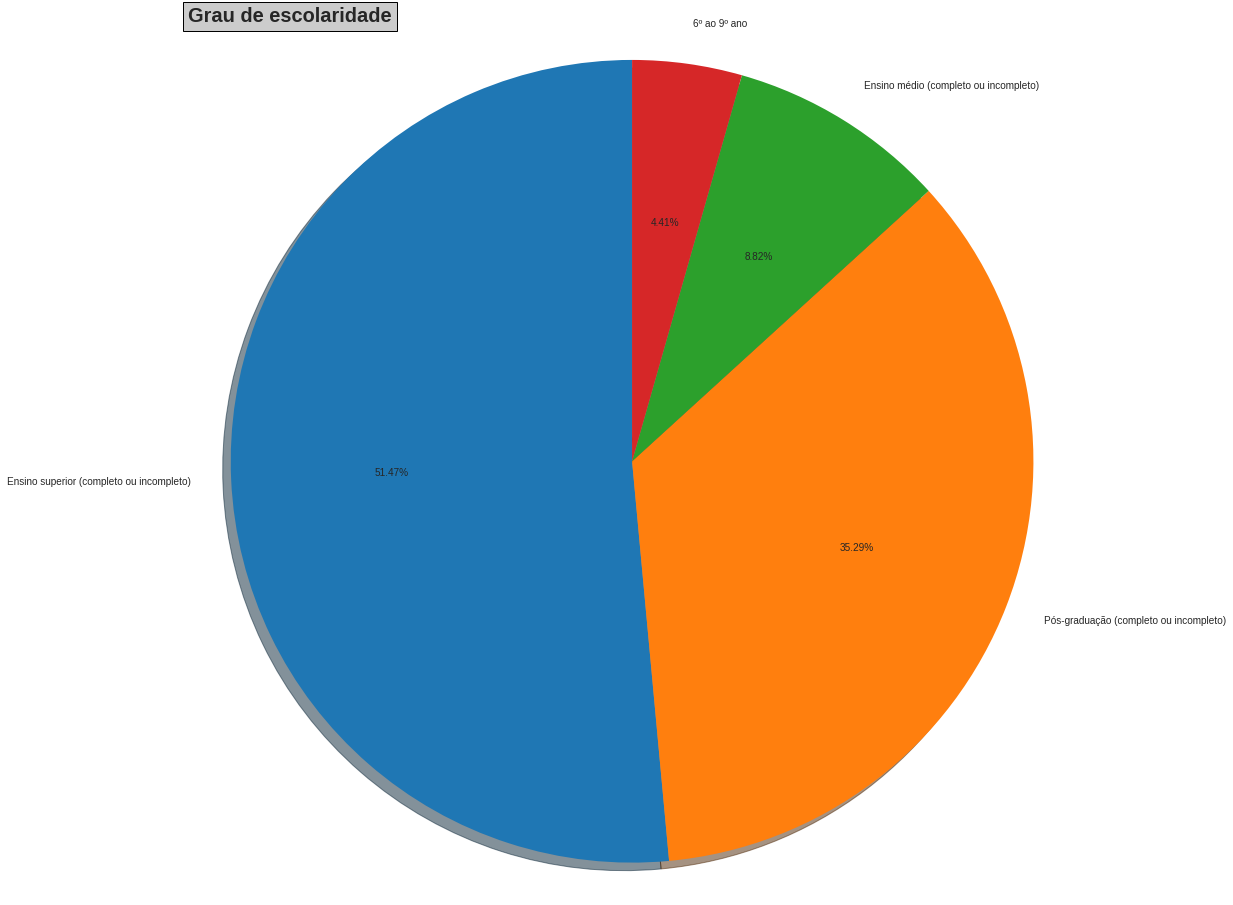

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('seaborn-dark')

schooling = dfPoll['schooling'].value_counts()

fig = plt.gcf()
fig.set_size_inches(16, 16)
plt.pie(schooling, labels = schooling.index, autopct = '%1.2f%%', shadow = True, startangle = 90)
plt.title("Grau de escolaridade", fontweight = 'bold', fontsize = '20', loc = 'left', bbox={'facecolor':'0.8', 'pad':5})
plt.axis('equal')

plt.show()

There are some in cases we want to represent quantitative data in a pie chart.One way is to create categories assigning a range for each one. A variable known for using in this way is weights, creating a range of weights to represent each category in a pie chart.

Let's do it for the heights:


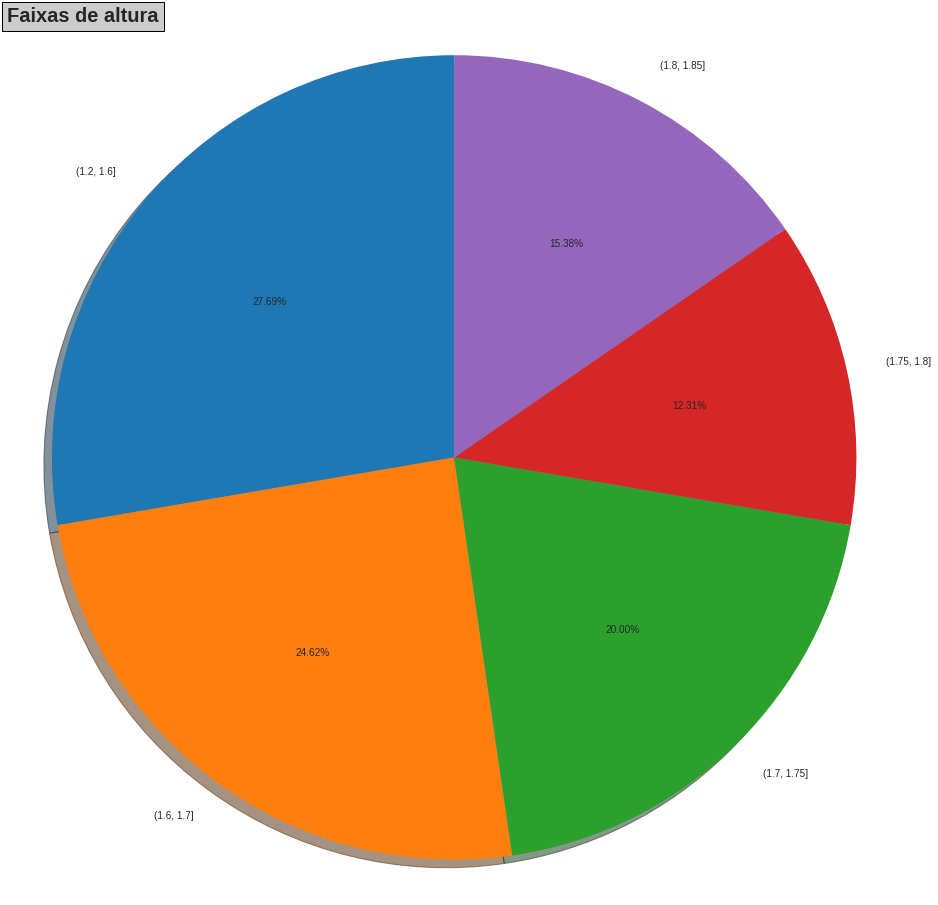

In [ ]:
ranges = [1.2, 1.6, 1.7, 1.75, 1.8, 1.85]
height = dfPoll['height_m'].groupby(pd.cut(dfPoll['height_m'], ranges)).count()

fig = plt.gcf()
fig.set_size_inches(16, 16)
plt.pie(height, labels = height.index, autopct = '%1.2f%%', shadow = True, startangle = 90)
plt.title("Faixas de altura", fontweight = 'bold', fontsize = '20', loc = 'left', bbox={'facecolor':'0.8', 'pad':5})
plt.axis('equal')

plt.show()

Activities:

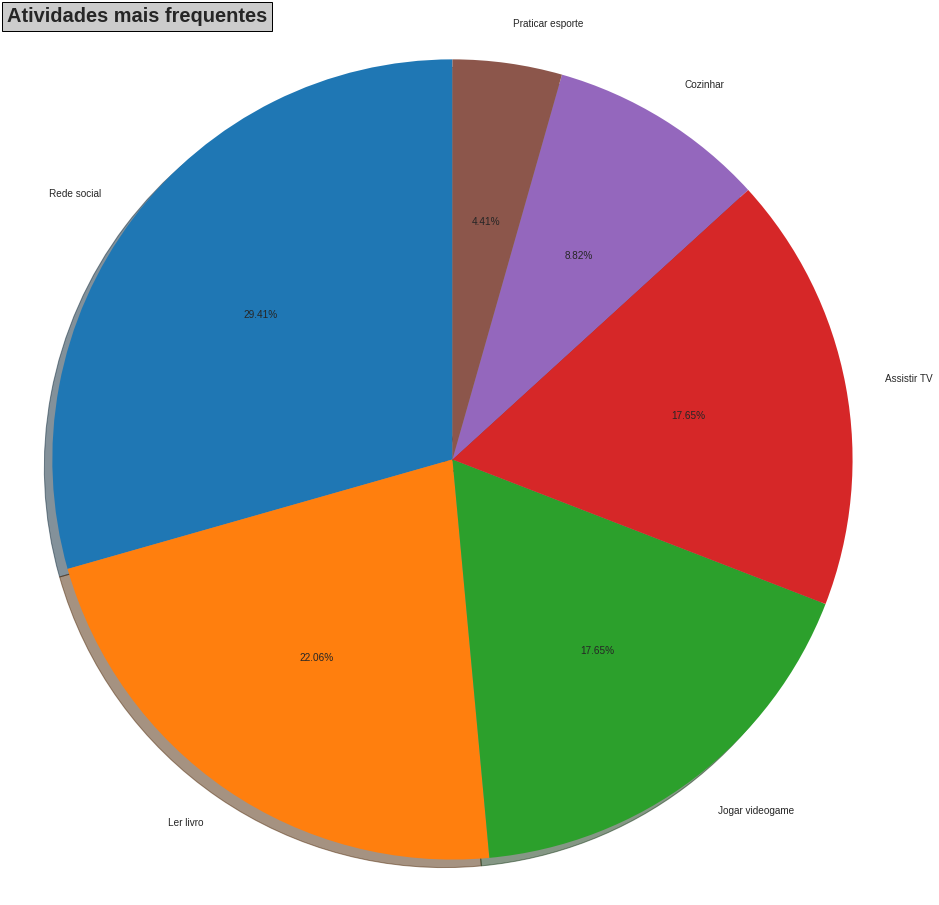

In [ ]:
freq = dfPoll['freq_activity'].value_counts()

fig = plt.gcf()
fig.set_size_inches(16, 16)
plt.pie(freq, labels = freq.index, autopct = '%1.2f%%', shadow = True, startangle = 90)
plt.title("Atividades mais frequentes", fontweight = 'bold', fontsize = '20', loc = 'left', bbox={'facecolor':'0.8', 'pad':5})
plt.axis('equal')

plt.show()

Number of people who work/study:

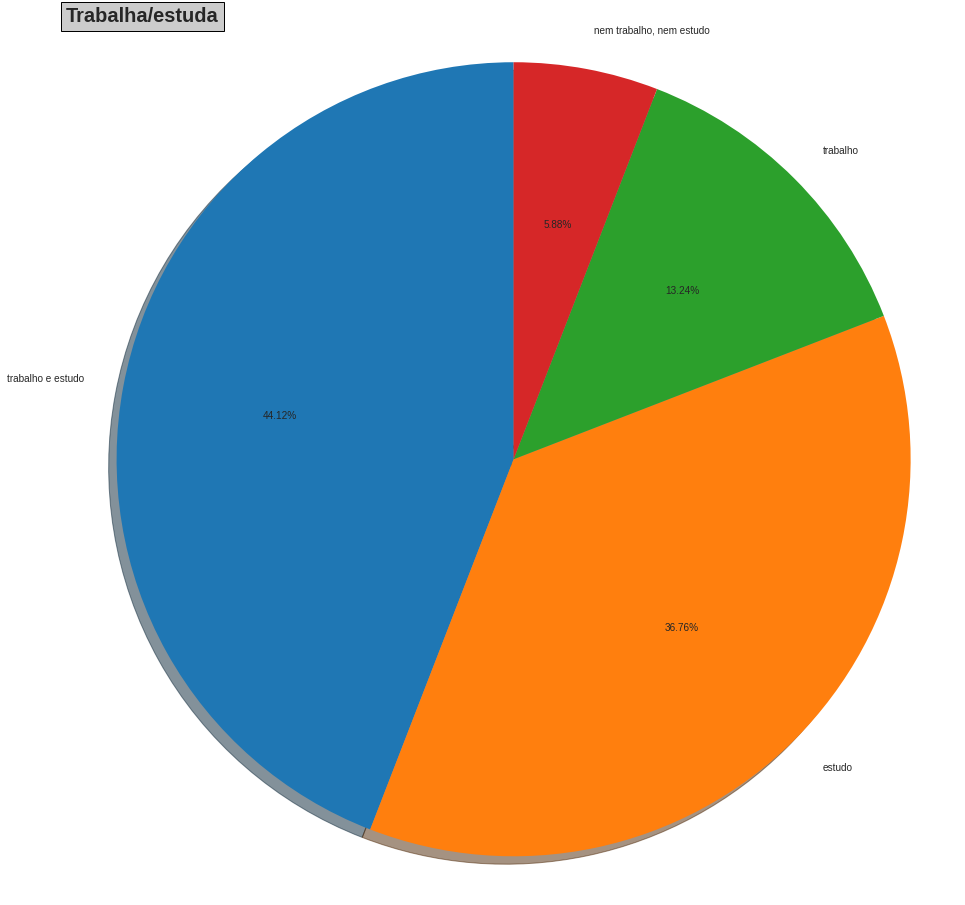

In [ ]:
work = dfPoll['work_study'].value_counts()

fig = plt.gcf()
fig.set_size_inches(16, 16)
plt.pie(work, labels = work.index, autopct = '%1.2f%%', shadow = True, startangle = 90)
plt.title("Trabalha/estuda", fontweight = 'bold', fontsize = '20', loc = 'left', bbox={'facecolor':'0.8', 'pad':5})
plt.axis('equal')

plt.show()

### Bar chart <a name="bar"></a>

For bar charts generally we count the absolute frequency for each value on a variable and represent using bars. The bigger the bar, the bigger the frequency the value appears.

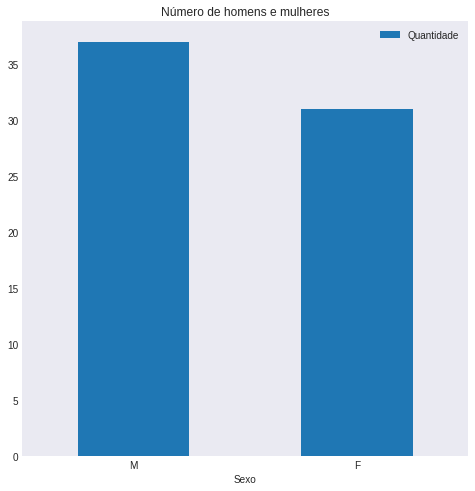

In [ ]:
sex = dfPoll['sex'].value_counts().to_frame()

sex.reset_index(level=0, inplace=True) 
sex.columns = ['Sexo', 'Quantidade']

sex.plot.bar(x = 'Sexo', y = 'Quantidade', rot = 0, title = "Número de homens e mulheres");

fig = plt.gcf()
fig.set_size_inches(8, 8)

plt.show(block=True);

Age range:

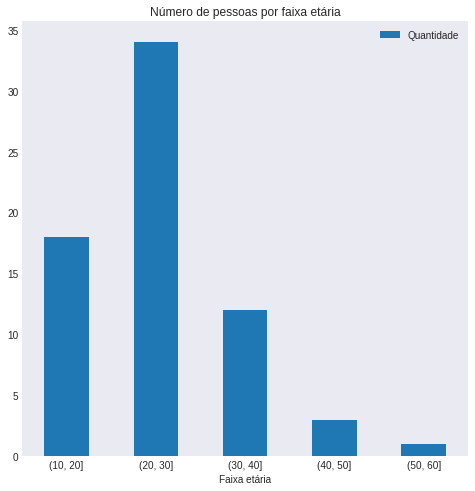

In [ ]:
ranges = [10, 20, 30, 40, 50, 60]
age = dfPoll['age'].groupby(pd.cut(dfPoll['age'], ranges)).count().to_frame()
age.columns = ['Quantidade']
age.reset_index(level=0, inplace=True) 
age.columns = ['Faixa etária', 'Quantidade']

age.plot.bar(x = 'Faixa etária', y = 'Quantidade', rot = 0, title = "Número de pessoas por faixa etária");

fig = plt.gcf()
fig.set_size_inches(8, 8)

plt.show(block=True);

States:

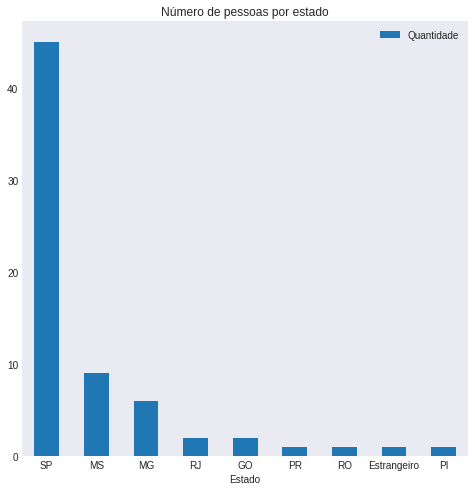

In [ ]:
state = dfPoll['state'].value_counts().to_frame()

state.reset_index(level=0, inplace=True) 
state.columns = ['Estado', 'Quantidade']

state.plot.bar(x = 'Estado', y = 'Quantidade', rot = 0, title = "Número de pessoas por estado");

fig = plt.gcf()
fig.set_size_inches(8, 8)

plt.show(block=True);

Number of brothers including the person:

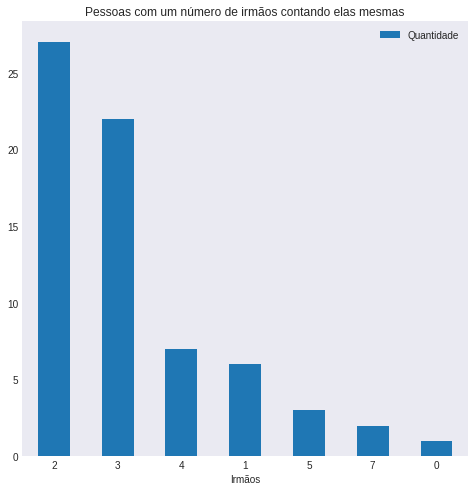

In [ ]:
brothers = dfPoll['brothersplus_you'].value_counts().to_frame()

brothers.reset_index(level=0, inplace=True) 
brothers.columns = ['Irmãos', 'Quantidade']

brothers.plot.bar(x = 'Irmãos', y = 'Quantidade', rot = 0, title = "Pessoas com um número de irmãos contando elas mesmas");

fig = plt.gcf()
fig.set_size_inches(8, 8)

plt.show(block=True);

### Pareto chart <a name="pareto"></a>

A Pareto chart combines both bar and line graph, where individual values are represented in descending order by bars, and the cumulative total is represented by the line. It's usually used for quality control. With the complete table of frequencies made before we can do this graph without much problem.

Let's do it for `freq_activity`:

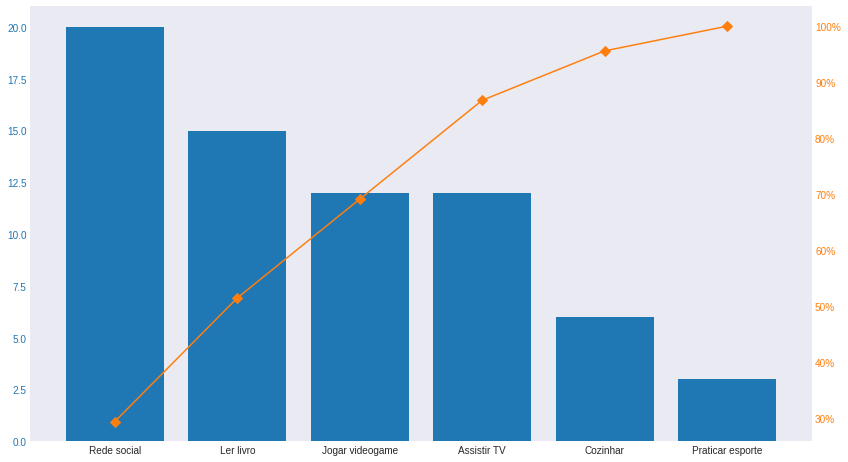

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

freq = dfPoll['freq_activity'].value_counts().to_frame()

freq.columns = ['Quantidade']

freq = freq.sort_values(by='Quantidade',ascending=False)

freq["cumpercentage"] = freq["Quantidade"].cumsum()/freq["Quantidade"].sum()*100

fig, ax = plt.subplots()
ax.bar(freq.index, freq["Quantidade"], color="C0")
ax2 = ax.twinx()
ax2.plot(freq.index, freq["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.show()

Doing Pareto chart for variable `state`:

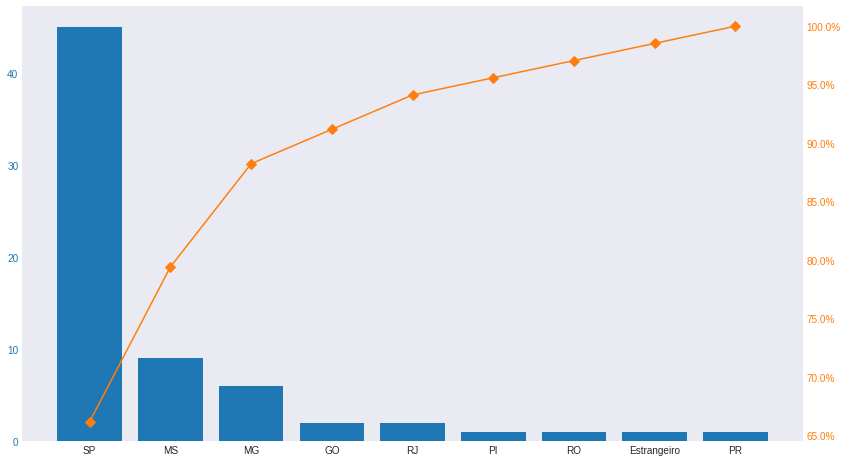

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

state = dfPoll['state'].value_counts().to_frame()

state.columns = ['Quantidade']

state = state.sort_values(by='Quantidade',ascending=False)

state["cumpercentage"] = state["Quantidade"].cumsum()/state["Quantidade"].sum()*100

fig, ax = plt.subplots()
ax.bar(state.index, state["Quantidade"], color="C0")
ax2 = ax.twinx()
ax2.plot(state.index, state["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.show()

### Boxplot <a name="boxplot"></a>

(Image from [Wikipedia](https://en.wikipedia.org/wiki/Box_plot))
![Boxplot](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/550px-Boxplot_vs_PDF.svg.png)

Boxplot is probably one of the graphs that need more explanations. It's important to have the knowledge of the measures of position and dispersion to make a boxplot, given that it combines them.

The main points of the boxplot are the quantiles. We use the $Q_1$ which is $P_{25th}$, $P_{50th} = median(x)$ and $Q_3 = P_{75th}$. Beyond that we use the concept of outliers demonstrated before. Now we can plot a proper boxplot.

Doing it for heights (as we did before calculating the outliers):

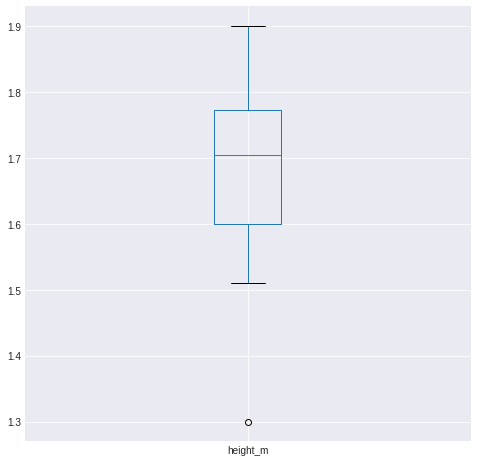

In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 8)

dfPoll.boxplot(column=['height_m'])

As expected the outlier was the same we encountered before.

For age:

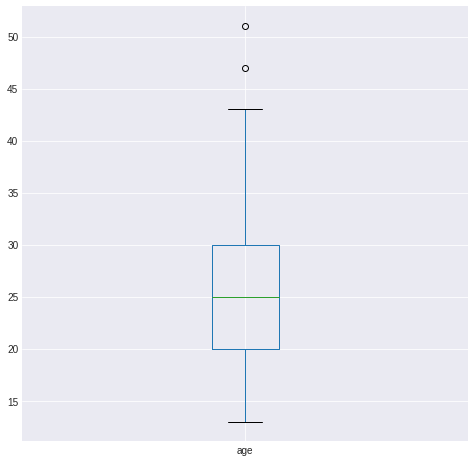

In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 8)

dfPoll.boxplot(column=['age'])

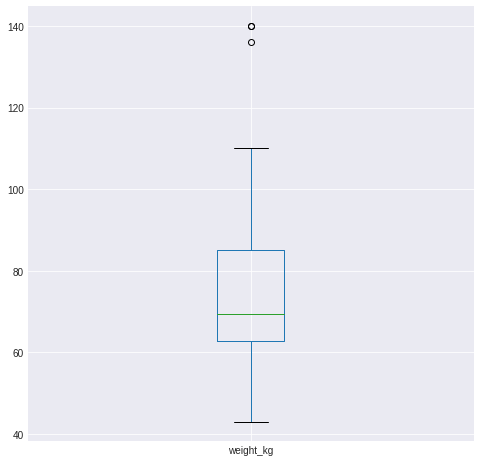

In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 8)

dfPoll.boxplot(column=['weight_kg'])

### Scatter plot <a name="dispersion"></a>

Usually we use scatter plots to find relationships between variables. In case we see a correlation we could even do a trending line. Weight and height generally has some degree of correlation.

Let's do it for them:

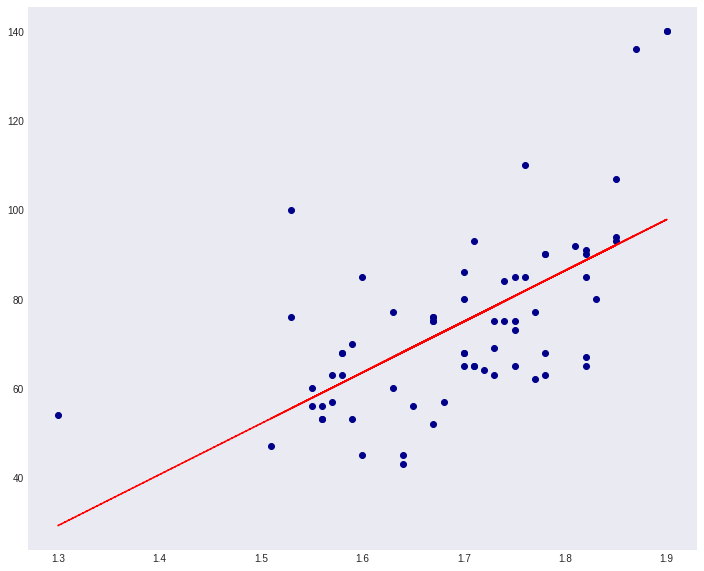

In [ ]:
x = dfPoll['height_m']
y = dfPoll['weight_kg']

plt.scatter(x, y, c = 'DarkBlue')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

fig = plt.gcf()
fig.set_size_inches(12, 10)

plt.show()

### Line chart <a name="line"></a>



A line chart is often used to visualize a trend in data over intervals of time – a time series – thus the line is often drawn chronologically. We don't have any data to represent in this way, but we can see how a variable change when other variable grows like the scatter plot.

Let's do it for age and height:

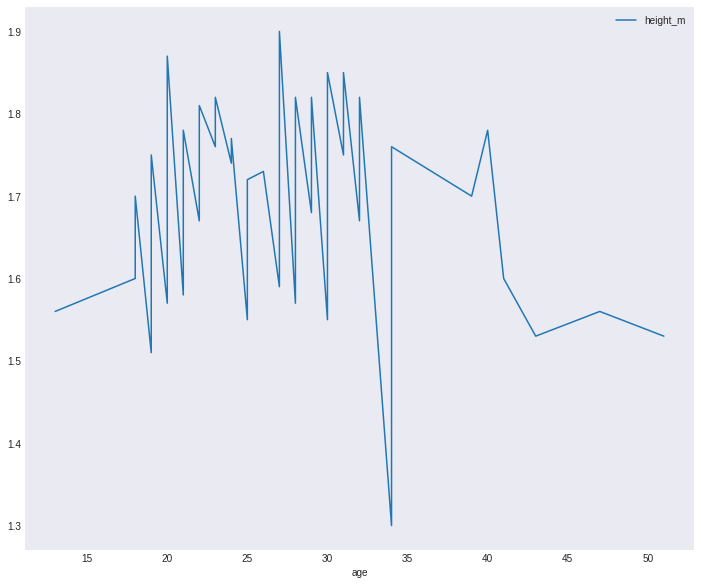

In [ ]:
df = dfPoll

df = df.sort_values(by=['age', 'height_m'])

df.plot(x = 'age', y = 'height_m', kind = 'line')

fig = plt.gcf()
fig.set_size_inches(12, 10)

plt.show()

Note that we had to sort the values to make some sense of the data. Scatterplot the values are sorted by default to observe a possible correlation.

## References <a name="refs"></a>

ROSS, S. M. Introductory Statistics. 4th Edition. Academic Press. February 2017

MAGALHÃES, M. N. Noções de Probabilidade e Estatística. 7th edition. Edusp. 2015.